In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set style
sns.set(style="whitegrid")

In [3]:
# 2. Load Dataset
# upload dataset pada google colab
# Ganti dengan path dataset yang berbeda-beda untuk tiap mahasiswa
file_path = "/content/202355202088_Fisal Aliama.csv"
#df = pd.read_csv(file_path)
df = pd.read_csv(file_path, sep=';', quotechar='"')

In [4]:
df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,16.331.666.666.666.600
1,0,0,2,1,59,2,0,False,200.86
2,0,0,2,1,59,4,0,False,15.488.888.888.888.800
3,0,0,2,1,59,6,0,False,108.64
4,0,0,2,1,60,1,0,True,8.546.666.666.666.660
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425
2039,2,3,2,1,90,5,1,True,13.169.833.333.333.300
2040,2,3,2,1,90,5,2,False,9365.45
2041,2,3,2,1,90,5,3,False,8.474.025


In [5]:
# 3. Informasi Umum Dataset
print("🔍 Informasi Umum Dataset")
print("-" * 40)
print("Jumlah baris dan kolom:", df.shape)
print("\n5 baris pertama:")
print(df.head())
print("\nTipe data dan nilai null:")
print(df.info())

🔍 Informasi Umum Dataset
----------------------------------------
Jumlah baris dan kolom: (2043, 9)

5 baris pertama:
   process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                    0                    0                    2   
1                    0                    0                    2   
2                    0                    0                    2   
3                    0                    0                    2   
4                    0                    0                    2   

   process.b4.capacity  property.price  property.product  property.winner  \
0                    1              59                 1                0   
1                    1              59                 2                0   
2                    1              59                 4                0   
3                    1              59                 6                0   
4                    1              60                 1                0   

   verific

In [6]:
# 4. Cek Nilai yang Hilang (Missing Values)
print("\n📌 Jumlah Missing Values per Kolom:")
print(df.isnull().sum())


📌 Jumlah Missing Values per Kolom:
process.b1.capacity    0
process.b2.capacity    0
process.b3.capacity    0
process.b4.capacity    0
property.price         0
property.product       0
property.winner        0
verification.result    0
verification.time      0
dtype: int64


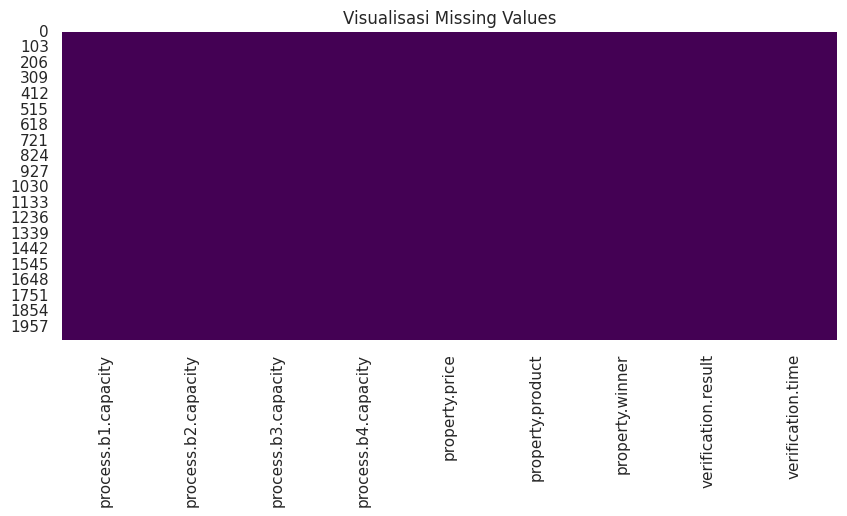

In [7]:
# Visualisasi missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Missing Values")
plt.show()


In [8]:
# 5. Statistik Deskriptif
print("\n📊 Statistik Deskriptif")
print(df.describe(include='all'))


📊 Statistik Deskriptif
        process.b1.capacity  process.b2.capacity  process.b3.capacity  \
count           2043.000000          2043.000000          2043.000000   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean               1.000000             2.093979             1.883994   
std                0.816696             0.811269             0.320310   
min                0.000000             0.000000             1.000000   
25%                0.000000             1.000000             2.000000   
50%                1.000000             2.000000             2.000000   
75%                2.000000             3.000000             2.000000   
max                2.000000             3.000000             2.000000   

        process.b4.capacity  property.price  property.product  \
count           2043.000000     20


📈 Distribusi Kelas pada Kolom 'property.price':
property.price
70    221
80    221
60    119
69    105
59     83
61     68
63     68
62     68
65     68
66     68
67     68
68     68
64     68
90     66
71     62
72     62
74     62
73     62
77     62
75     62
78     62
79     62
76     62
81     14
82     14
83     14
85     14
84     14
86     14
87     14
88     14
89     14
Name: count, dtype: int64


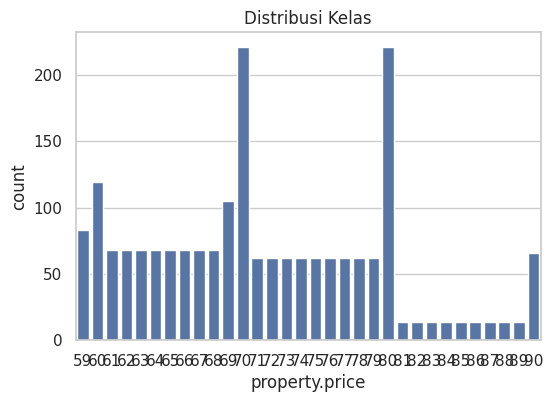

In [9]:
# 6. Distribusi Target (Jika Ada Kolom Target)
# Misal: kolom target adalah 'label'
if 'property.price' in df.columns:
    print("\n📈 Distribusi Kelas pada Kolom 'property.price':")
    print(df['property.price'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='property.price')
    plt.title("Distribusi Kelas")
    plt.show()
elif 'quality' in df.columns: # Assuming 'quality' might be the target in this dataset
    print("\n📈 Distribusi Kelas pada Kolom 'quality':")
    print(df['quality'].value_counts())

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='quality')
    plt.title("Distribusi Kelas ('quality')")
    plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


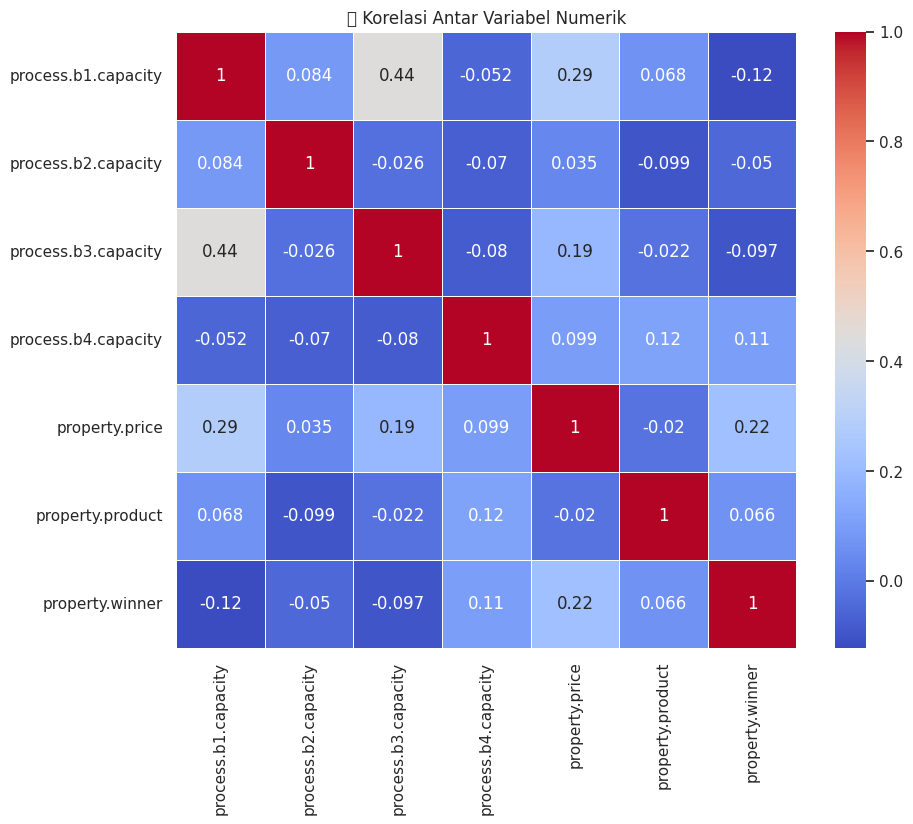

In [10]:
# 7. Korelasi Antar Variabel Numerik
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Korelasi Antar Variabel Numerik")
plt.show()

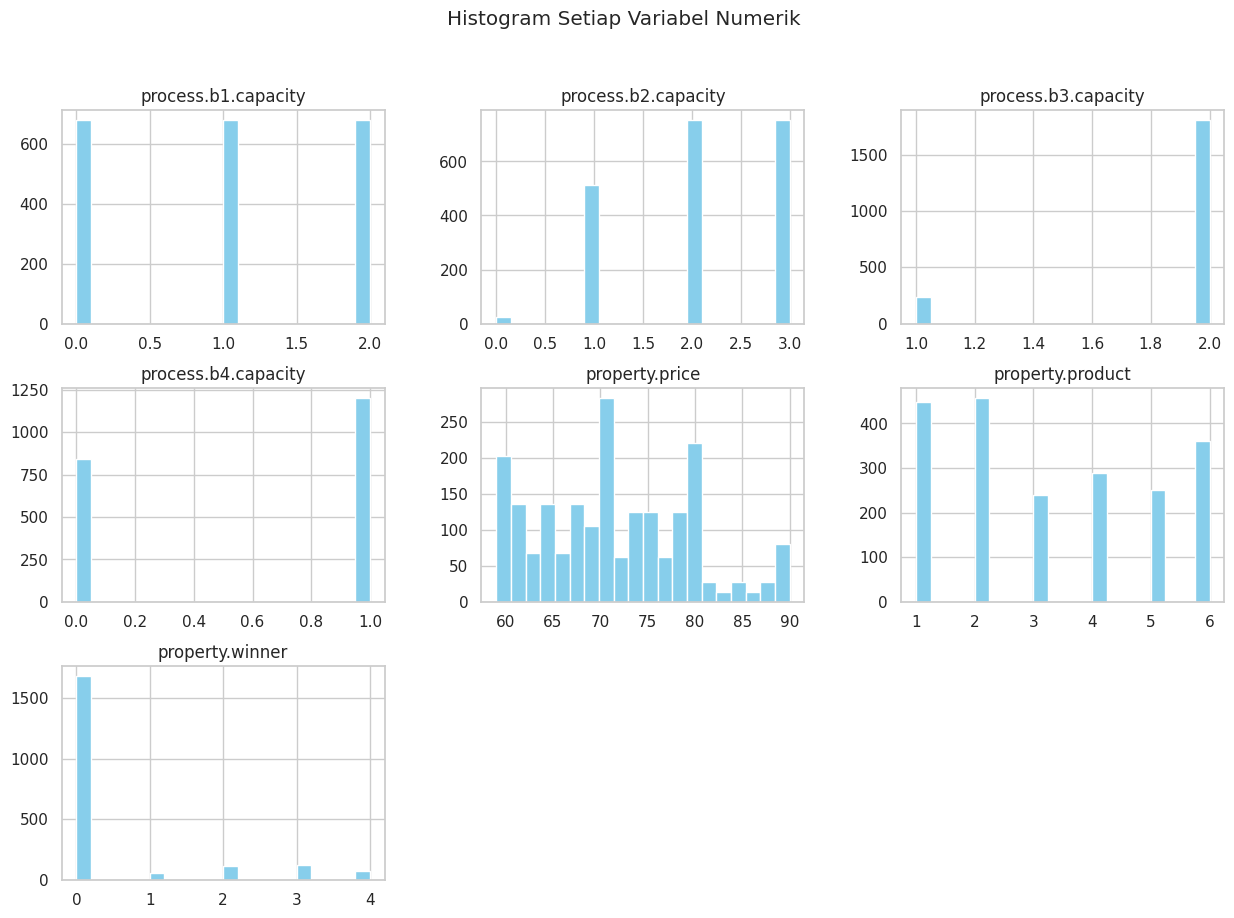

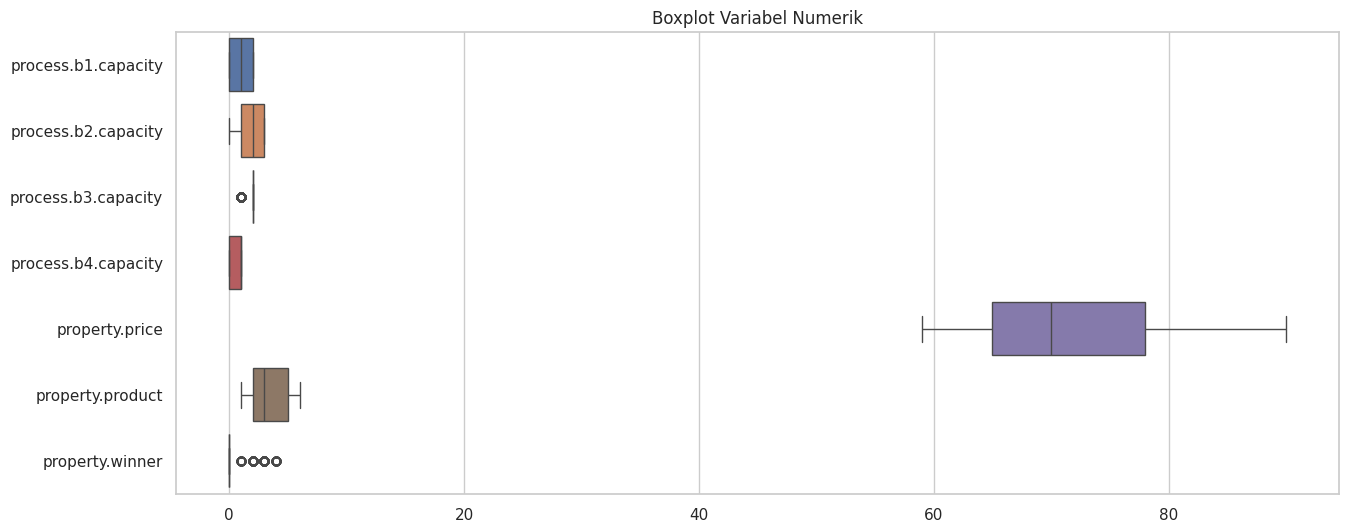

In [11]:
# 8. Visualisasi Histogram dan Boxplot untuk Kolom Numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# Histogram
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histogram Setiap Variabel Numerik")
plt.show()

# Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols], orient="h")
plt.title("Boxplot Variabel Numerik")
plt.show()

In [12]:
# 9. Pairplot (opsional, untuk jumlah fitur kecil)
if len(numeric_cols) <= 5:
    sns.pairplot(df[numeric_cols])
    plt.show()

In [13]:
# 10. Simpan Laporan EDA
# Ganti nama eda_summary.csv menjadi nim_nama.csv
df.describe().to_csv("eda_summary.csv")
print("✅ EDA selesai. Ringkasan disimpan di file 'eda_summary.csv'.")

✅ EDA selesai. Ringkasan disimpan di file 'eda_summary.csv'.


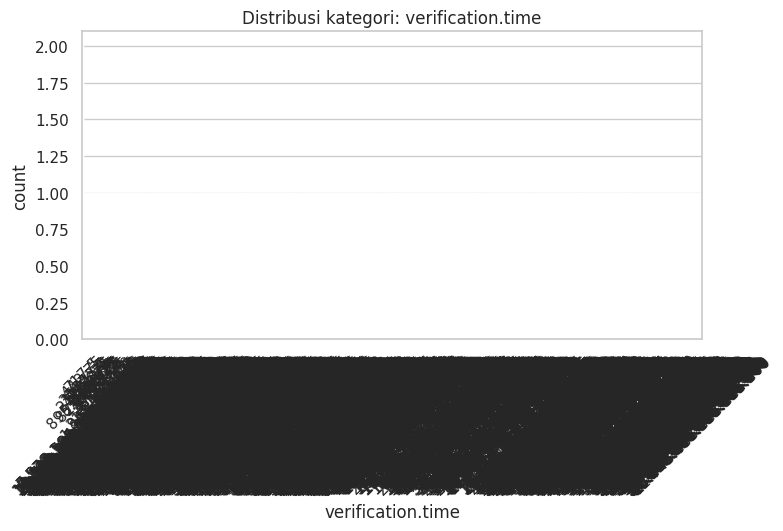

In [14]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    if df[col].nunique() < 2050:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Distribusi kategori: {col}')
        plt.xticks(rotation=45)
        plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


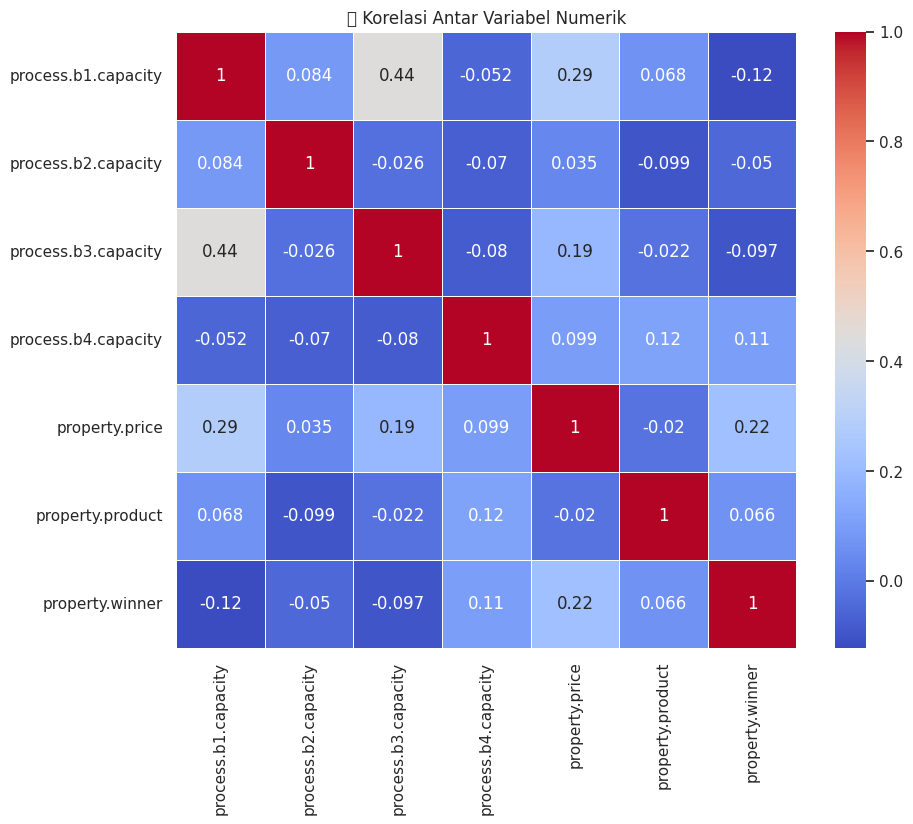

In [15]:
numeric_df = df.select_dtypes(include=np.number)

if numeric_df.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("🔗 Korelasi Antar Variabel Numerik")
    plt.show()
else:
    print("🚫 Tidak cukup kolom numerik untuk korelasi.")

In [16]:
target_col = 'y' if 'y' in df.columns else None

if target_col:
    for col in numeric_cols:
        plt.figure()
        sns.histplot(data=df, x=col, hue=target_col, kde=True, bins=30)
        plt.title(f'Distribusi {col} berdasarkan {target_col}')
        plt.show()

In [17]:
if target_col:
    for col in categorical_cols:
        if df[col].nunique() < 10:
            ct = pd.crosstab(df[col], df[target_col], normalize='index')
            ct.plot(kind='bar', stacked=True)
            plt.title(f'Distribusi {target_col} berdasarkan {col}')
            plt.ylabel('Proporsi')
            plt.xticks(rotation=45)
            plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

if len(numeric_df.columns) > 1:
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]
    print("\n📌 Variance Inflation Factor (VIF):\n")
    print(vif_data)


📌 Variance Inflation Factor (VIF):

               feature        VIF
0  process.b1.capacity   2.982395
1  process.b2.capacity   7.335068
2  process.b3.capacity  34.403163
3  process.b4.capacity   2.530092
4       property.price  41.548359
5     property.product   4.166414
6      property.winner   1.290336


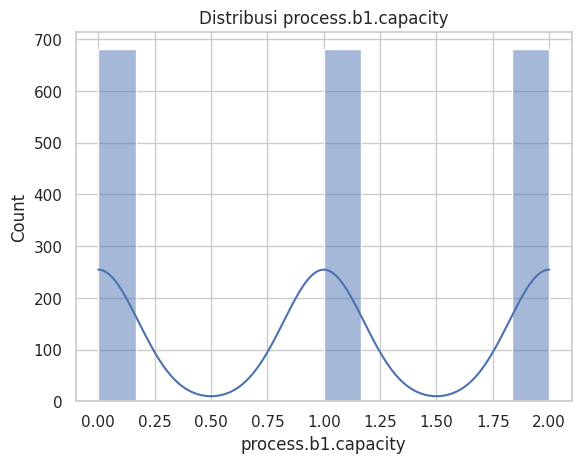

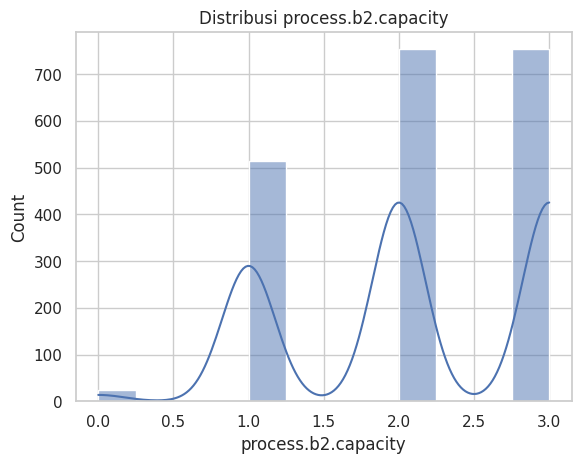

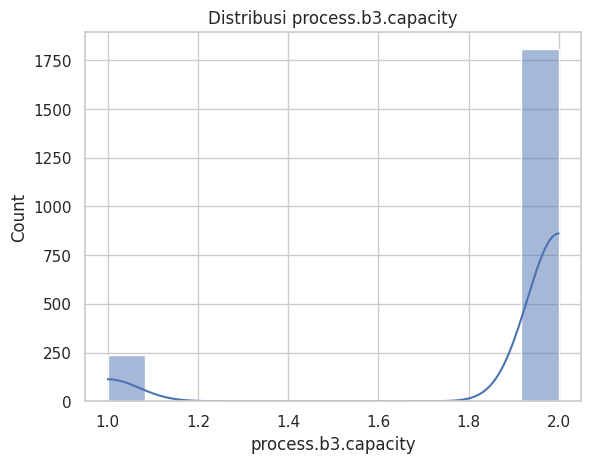

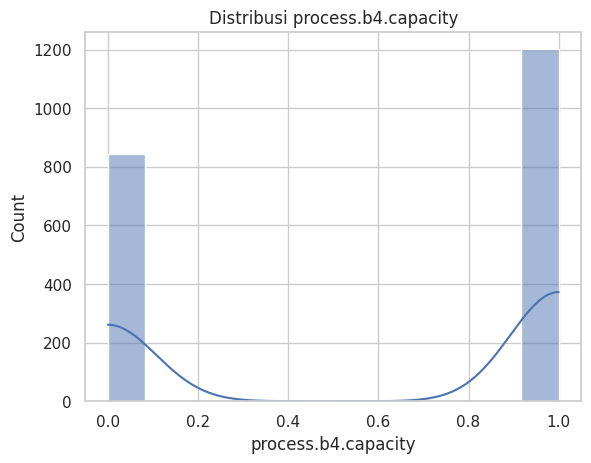

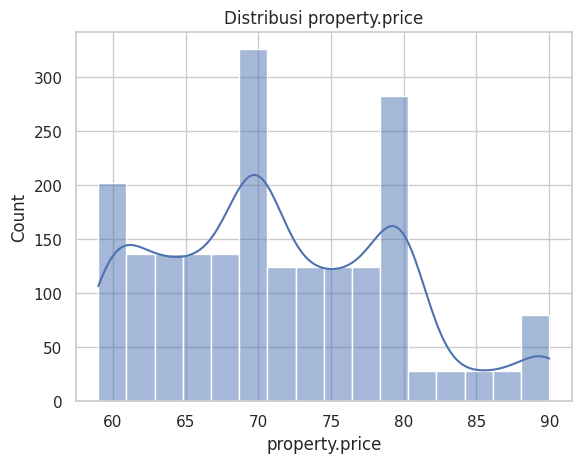

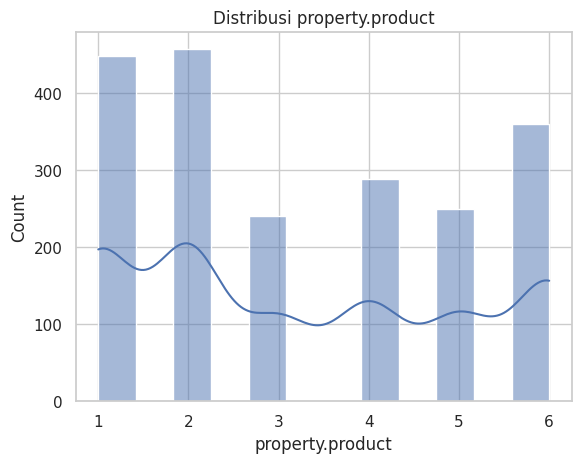

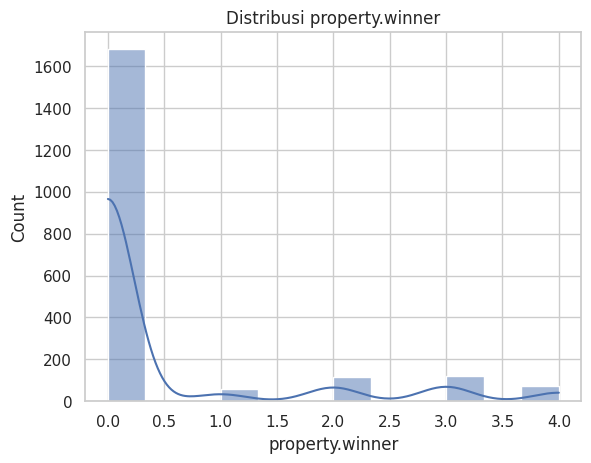

In [19]:
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    plt.savefig(f"hist_{col}.png")
    plt.show() # <-- izin pak ini di tambahkan agara dapat menampilkan gambar grafik
    plt.close()
